In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

data = pd.read_csv('/content/dataset.csv')
data.head()

,timestamps,TP9,AF7,AF8,TP10,Right AUX,Emotion,Subject
0,1533222560,59.105,28.320,15.137,12.207,54.199,Stressed,Subject A
1,1533222560,62.012,30.273,43.945,11.719,79.102,Stressed,Subject A
2,1533222560,44.922,30.273,-97.656,11.230,32.715,Stressed,Subject A
3,1533222560,28.809,27.832,-110.352,9.277,29.785,Stressed,Subject A
4,1533222560,36.156,28.809,-73.242,11.230,50.781,Stressed,Subject A


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319776 entries, 0 to 319775
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   timestamps  319776 non-null  int64  
 1   TP9         319776 non-null  float64
 2   AF7         319776 non-null  float64
 3   AF8         319776 non-null  float64
 4   TP10        319776 non-null  float64
 5   Right AUX   319776 non-null  float64
 6   Emotion     319776 non-null  object 
 7   Subject     319776 non-null  object 
dtypes: float64(5), int64(1), object(2)
memory usage: 19.5+ MB


In [ ]:
data.isnull().sum()

,0
timestamps,0
TP9,0
AF7,0
AF8,0
TP10,0
Right AUX,0
Emotion,0
Subject,0


In [ ]:
data = data.drop(columns = ['timestamps', 'Subject'], axis = 1)
data = data.replace(['neutral', 'relaxed'], 'Unstressed')
data.tail()

,TP9,AF7,AF8,TP10,Right AUX,Emotion
319771,11.230,14.648,40.039,10.254,-23.926,Unstressed
319772,-1.465,12.207,29.297,0.000,40.039,Unstressed
319773,-4.395,10.742,28.809,-7.812,50.293,Unstressed
319774,29.785,11.719,29.785,1.465,-0.977,Unstressed
319775,38.574,14.648,32.715,6.836,-27.344,Unstressed


In [ ]:
data[data.duplicated()].sum()

,0
TP9,0.0
AF7,0.0
AF8,0.0
TP10,0.0
Right AUX,0.0
Emotion,0


In [ ]:
Stressed = data[data['Emotion'] == 'Stressed']
Unstressed = data[data['Emotion'] == 'Unstressed']
print(Stressed.shape)
print(Unstressed.shape)

(93984, 6)
(225792, 6)


In [ ]:
Unstressed = Unstressed.sample(frac = 1)
Stressed = Stressed.sample(frac = 1)
Unstressed.shape

(225792, 6)

In [ ]:
Unstressed

,TP9,AF7,AF8,TP10,Right AUX,Emotion
235802,9.277,15.137,30.273,9.277,29.785,Unstressed
88978,33.691,32.227,28.809,-7.324,64.453,Unstressed
210489,38.086,-13.672,767.578,50.293,-0.977,Unstressed
133700,28.809,27.832,35.156,11.719,57.617,Unstressed
71265,24.902,16.602,23.926,7.324,-16.602,Unstressed
...,...,...,...,...,...,...
118517,30.273,13.672,61.523,8.789,42.480,Unstressed
260554,36.621,9.277,0.977,-5.371,-63.477,Unstressed
59277,41.016,20.020,26.367,21.484,14.648,Unstressed
118680,-12.207,27.344,-20.508,-13.672,39.062,Unstressed


In [ ]:
Unstressed = pd.concat([Unstressed.iloc[:46992], Unstressed.iloc[-46992:]])
Stressed = Stressed.iloc[:93984]
data = pd.concat([Stressed, Unstressed])
data.shape

(187968, 6)

In [ ]:
data

,TP9,AF7,AF8,TP10,Right AUX,Emotion
9169,-105.469,35.156,-59.570,-136.230,23.438,Stressed
26125,31.738,52.734,260.742,14.160,83.984,Stressed
258923,-6.836,28.320,-279.297,25.879,13.184,Stressed
20887,17.090,34.180,388.672,4.395,90.332,Stressed
109258,52.734,30.273,51.270,17.578,20.996,Stressed
...,...,...,...,...,...,...
118517,30.273,13.672,61.523,8.789,42.480,Unstressed
260554,36.621,9.277,0.977,-5.371,-63.477,Unstressed
59277,41.016,20.020,26.367,21.484,14.648,Unstressed
118680,-12.207,27.344,-20.508,-13.672,39.062,Unstressed


In [ ]:
from sklearn.utils import shuffle
data = shuffle(data)
data.head()

,TP9,AF7,AF8,TP10,Right AUX,Emotion
143480,8.789,29.297,29.297,9.277,-40.527,Unstressed
15733,23.926,30.273,131.348,-14.648,-38.574,Stressed
99410,49.805,29.785,-468.750,20.996,38.574,Stressed
253912,33.203,22.461,-75.195,40.039,18.555,Stressed
257453,54.688,25.391,191.895,31.738,11.719,Stressed


In [ ]:
data = data.reset_index(drop = True)
data.head()

,TP9,AF7,AF8,TP10,Right AUX,Emotion
0,8.789,29.297,29.297,9.277,-40.527,Unstressed
1,23.926,30.273,131.348,-14.648,-38.574,Stressed
2,49.805,29.785,-468.750,20.996,38.574,Stressed
3,33.203,22.461,-75.195,40.039,18.555,Stressed
4,54.688,25.391,191.895,31.738,11.719,Stressed


In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
le = LabelEncoder()
sc = StandardScaler()
data['Emotion'] = le.fit_transform(data['Emotion'])
data.head()

,TP9,AF7,AF8,TP10,Right AUX,Emotion
0,8.789,29.297,29.297,9.277,-40.527,1
1,23.926,30.273,131.348,-14.648,-38.574,0
2,49.805,29.785,-468.750,20.996,38.574,0
3,33.203,22.461,-75.195,40.039,18.555,0
4,54.688,25.391,191.895,31.738,11.719,0


In [ ]:
X = data.drop(columns = ['Emotion'], axis = 1)
Y = data['Emotion']

X = sc.fit_transform(X)

In [ ]:
print(X)

[[-5.37758282e-01  2.53967622e-02  3.82655245e-02 -1.45089235e-01
  -1.88410877e+00]
 [-1.88755712e-03  4.10049226e-02  6.03789523e-01 -9.81912263e-01
  -1.82760428e+00]
 [ 9.14264818e-01  3.32008424e-02 -2.72170283e+00  2.64805397e-01
   4.04453085e-01]
 ...
 [-1.57476633e-01 -3.80655288e-01 -7.53812418e-02  3.16046598e-01
   7.85894527e-01]
 [-2.43891407e-01  5.87610376e-01  5.99109444e-02 -4.18329005e-01
  -2.45391895e-01]
 [-2.09339658e-01 -9.95484808e-02 -7.80855339e-02  3.67287799e-01
  -1.05063144e+00]]


In [ ]:
print(Y)

0         1
1         0
2         0
3         0
4         0
         ..
187963    1
187964    1
187965    0
187966    0
187967    1
Name: Emotion, Length: 187968, dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 2, shuffle = True)

In [ ]:
X_test, X_valid, Y_test, Y_valid = train_test_split(X_test, Y_test, test_size = 0.25, random_state = 21, shuffle = True)

In [ ]:
print(X_train.shape, X_test.shape, X_valid.shape)
print(Y_train.shape, Y_test.shape, Y_valid.shape)

(131577, 5) (42293, 5) (14098, 5)
(131577,) (42293,) (14098,)


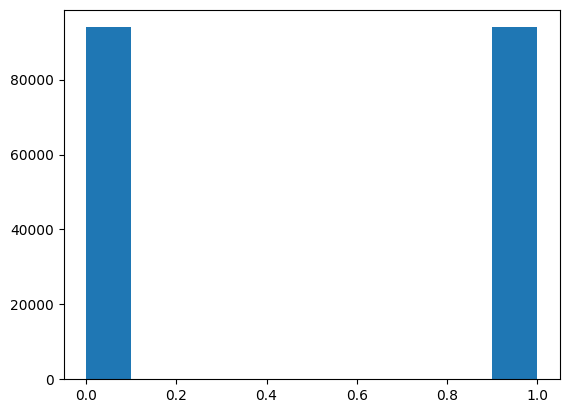

In [ ]:
plt.hist(data["Emotion"])
plt.show()

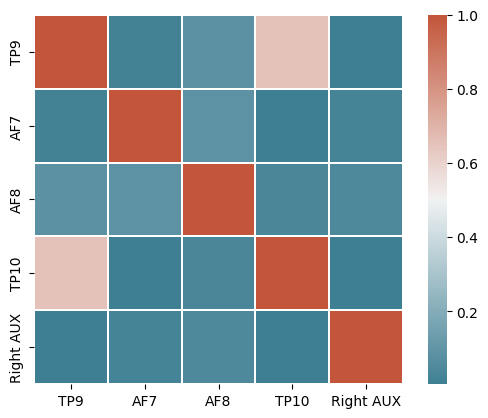

In [ ]:
d = data.drop(columns = ["Emotion"], axis = 1)
plt.figure()
corr = d.corr(method="pearson")
c = sns.diverging_palette(220, 20, as_cmap = True)
sns.heatmap(corr, cmap = c, square = True, linewidths = 0.2)
plt.show()

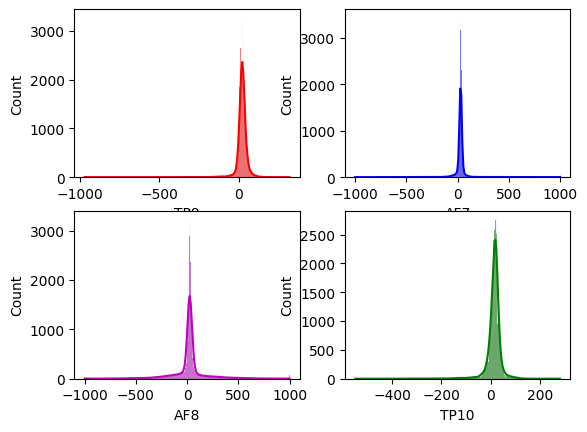

In [ ]:
plt.figure()
plt.subplot(2,2,1)
sns.histplot(data["TP9"], kde = True, color = 'r')
plt.subplot(2,2,2)
sns.histplot(data["AF7"], kde = True, color = 'b')
plt.subplot(2,2,3)
sns.histplot(data["AF8"], kde = True, color = 'm')
plt.subplot(2,2,4)
sns.histplot(data["TP10"], kde = True, color = 'g')
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold, cross_val_score, learning_curve
from sklearn.metrics import accuracy_score, classification_report

svm_model = SVC(kernel='rbf', C = 100, gamma = 0.1, probability = True, random_state=42)
knn = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski', metric_params=None, n_neighbors=3, p=2, weights='uniform')
rf = RandomForestClassifier(max_depth=80, min_samples_leaf=2, min_samples_split=10,n_estimators=1400, random_state=42)
dt = DecisionTreeClassifier(criterion = 'gini')

In [ ]:
from sklearn.metrics import accuracy_score, log_loss

num_epochs = 10
batch_size = len(X_train) // num_epochs
batch = len(X_valid) // num_epochs
accuracy_per_epoch = []
validation_loss = []
training_loss = []
validation_accuracy = []

for epoch in range(num_epochs):
    start = epoch * batch_size
    end = start + batch_size
    X_batch, Y_batch = X_train[start:end], Y_train[start:end]

    svm_model.fit(X_batch, Y_batch)
    y_pred = svm_model.predict(X_batch)
    y_val_proba = svm_model.predict_proba(X_batch)
    accuracy = accuracy_score(Y_batch, y_pred)
    train_loss = log_loss(Y_batch, y_val_proba)
    training_loss.append(train_loss)

    accuracy_per_epoch.append(accuracy)
    print(f"Epoch {epoch + 1}/{num_epochs}: Accuracy = {accuracy:.4f}")

    start = epoch * batch
    end = start + batch
    X_batch, Y_batch = X_valid[start:end], Y_valid[start:end]

    y_pred = svm_model.predict(X_batch)
    y_val_proba = svm_model.predict_proba(X_batch)
    valid_accuracy = accuracy_score(Y_batch, y_pred)
    svm_model.fit(X_batch, Y_batch)
    val_loss = log_loss(Y_batch, y_val_proba)
    validation_loss.append(val_loss)

    validation_accuracy.append(valid_accuracy)
    print(f"Epoch {epoch + 1}/{num_epochs}: Validation_Accuracy = {valid_accuracy:.4f}")

Epoch 1/10: Accuracy = 0.8514
Epoch 1/10: Validation_Accuracy = 0.8502
Epoch 2/10: Accuracy = 0.8542
Epoch 2/10: Validation_Accuracy = 0.8247
Epoch 3/10: Accuracy = 0.8499
Epoch 3/10: Validation_Accuracy = 0.8417
Epoch 4/10: Accuracy = 0.8519
Epoch 4/10: Validation_Accuracy = 0.8368
Epoch 5/10: Accuracy = 0.8542
Epoch 5/10: Validation_Accuracy = 0.8573
Epoch 6/10: Accuracy = 0.8557
Epoch 6/10: Validation_Accuracy = 0.8368
Epoch 7/10: Accuracy = 0.8556
Epoch 7/10: Validation_Accuracy = 0.8495
Epoch 8/10: Accuracy = 0.8535
Epoch 8/10: Validation_Accuracy = 0.8502
Epoch 9/10: Accuracy = 0.8462
Epoch 9/10: Validation_Accuracy = 0.8424
Epoch 10/10: Accuracy = 0.8569
Epoch 10/10: Validation_Accuracy = 0.8481


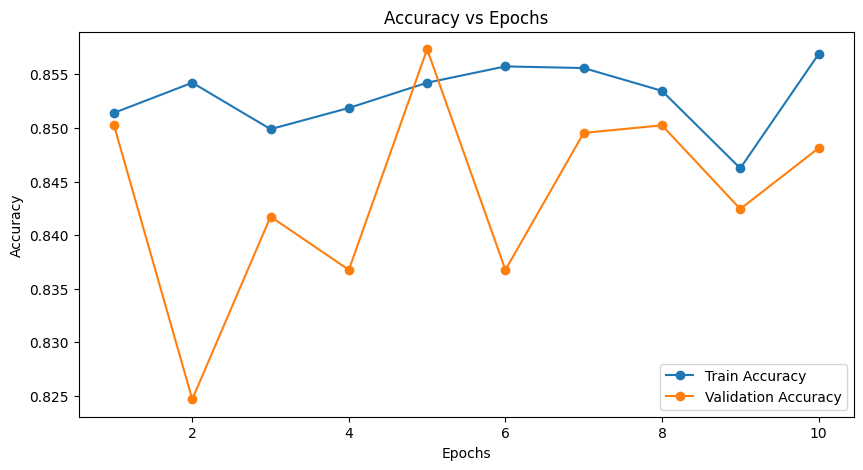

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), accuracy_per_epoch, label='Train Accuracy', marker='o')
plt.plot(range(1, 11), validation_accuracy, label='Validation Accuracy', marker='o')
plt.title('Accuracy vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

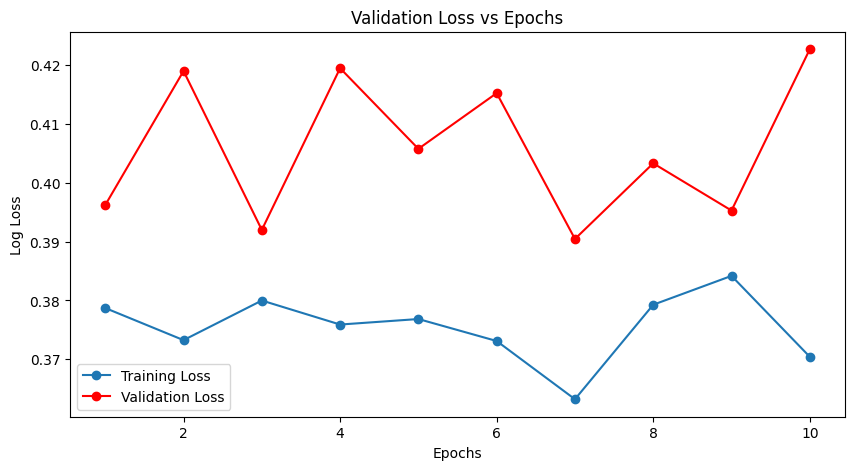

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), training_loss, label='Training Loss', marker='o')
plt.plot(range(1, 11), validation_loss, label='Validation Loss', marker='o', color='red')
plt.title('Validation Loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Log Loss')
plt.legend()
plt.show()

In [ ]:
y_test_pred = svm_model.predict(X_test)
test_accuracy = accuracy_score(Y_test, y_test_pred)
print(f"Final Test Accuracy: {test_accuracy * 100:.2f}%")

Final Test Accuracy: 82.03%



Classification Report:
              precision    recall  f1-score   support

    Stressed       0.92      0.70      0.80     21135
  Unstressed       0.76      0.94      0.84     21158

    accuracy                           0.82     42293
   macro avg       0.84      0.82      0.82     42293
weighted avg       0.84      0.82      0.82     42293



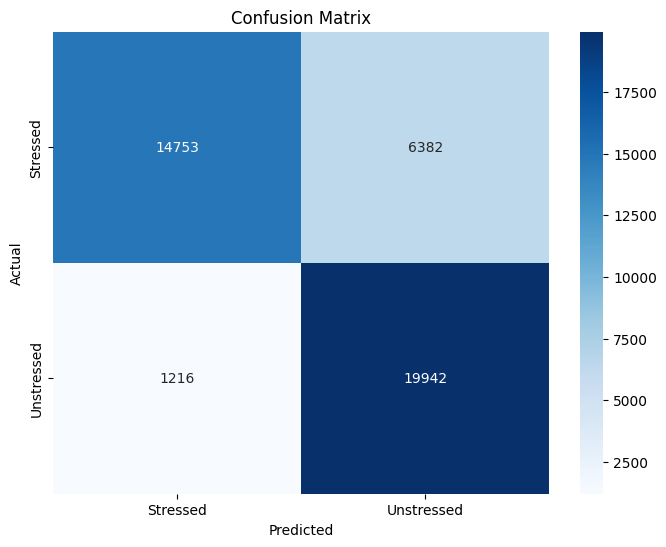

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(Y_test, y_test_pred)
print("\nClassification Report:")
print(classification_report(Y_test, y_test_pred, target_names=le.classes_))
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, log_loss

num_epochs = 10
batch_size = len(X_train) // num_epochs
batch = len(X_valid) // num_epochs
accuracy_per_epoch = []
validation_loss = []
training_loss = []
validation_accuracy = []

for epoch in range(num_epochs):
    start = epoch * batch_size
    end = start + batch_size
    X_batch, Y_batch = X_train[start:end], Y_train[start:end]

    knn.fit(X_batch, Y_batch)
    y_pred = knn.predict(X_batch)
    y_val_proba = knn.predict_proba(X_batch)
    accuracy = accuracy_score(Y_batch, y_pred)
    train_loss = log_loss(Y_batch, y_val_proba)
    training_loss.append(train_loss)

    accuracy_per_epoch.append(accuracy)
    print(f"Epoch {epoch + 1}/{num_epochs}: Accuracy = {accuracy:.4f}")

    start = epoch * batch
    end = start + batch
    X_batch, Y_batch = X_valid[start:end], Y_valid[start:end]

    y_pred = knn.predict(X_batch)
    y_val_proba = knn.predict_proba(X_batch)
    knn.fit(X_batch, Y_batch)
    valid_accuracy = accuracy_score(Y_batch, y_pred)
    val_loss = log_loss(Y_batch, y_val_proba)
    validation_loss.append(val_loss)

    validation_accuracy.append(valid_accuracy)
    print(f"Epoch {epoch + 1}/{num_epochs}: Validation_Accuracy = {valid_accuracy:.4f}")

Epoch 1/10: Accuracy = 0.9001
Epoch 1/10: Validation_Accuracy = 0.8432
Epoch 2/10: Accuracy = 0.9009
Epoch 2/10: Validation_Accuracy = 0.8148
Epoch 3/10: Accuracy = 0.8949
Epoch 3/10: Validation_Accuracy = 0.8275
Epoch 4/10: Accuracy = 0.9035
Epoch 4/10: Validation_Accuracy = 0.8211
Epoch 5/10: Accuracy = 0.8965
Epoch 5/10: Validation_Accuracy = 0.8417
Epoch 6/10: Accuracy = 0.9001
Epoch 6/10: Validation_Accuracy = 0.8247
Epoch 7/10: Accuracy = 0.9021
Epoch 7/10: Validation_Accuracy = 0.8368
Epoch 8/10: Accuracy = 0.9019
Epoch 8/10: Validation_Accuracy = 0.8254
Epoch 9/10: Accuracy = 0.8939
Epoch 9/10: Validation_Accuracy = 0.8211
Epoch 10/10: Accuracy = 0.9039
Epoch 10/10: Validation_Accuracy = 0.8268


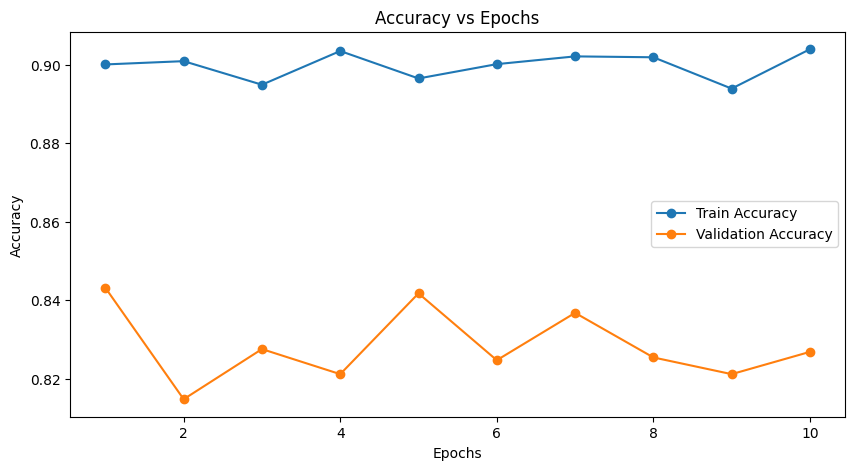

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), accuracy_per_epoch, label='Train Accuracy', marker='o')
plt.plot(range(1, 11), validation_accuracy, label='Validation Accuracy', marker='o')
plt.title('Accuracy vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

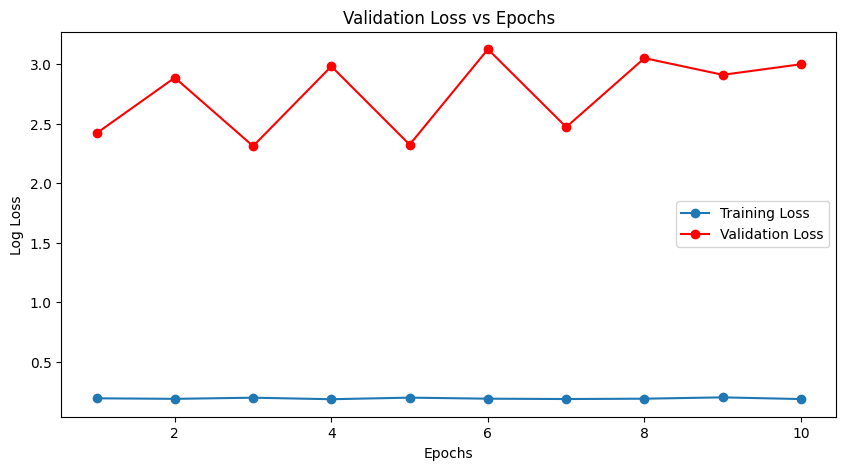

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), training_loss, label='Training Loss', marker='o')
plt.plot(range(1, 11), validation_loss, label='Validation Loss', marker='o', color='red')
plt.title('Validation Loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Log Loss')
plt.legend()
plt.show()

In [ ]:
y_test_pred = knn.predict(X_test)
test_accuracy = accuracy_score(Y_test, y_test_pred)
print(f"Final Test Accuracy: {test_accuracy * 100:.2f}%")

Final Test Accuracy: 79.63%



Classification Report:
              precision    recall  f1-score   support

    Stressed       0.86      0.70      0.78     21135
  Unstressed       0.75      0.89      0.81     21158

    accuracy                           0.80     42293
   macro avg       0.81      0.80      0.79     42293
weighted avg       0.81      0.80      0.79     42293



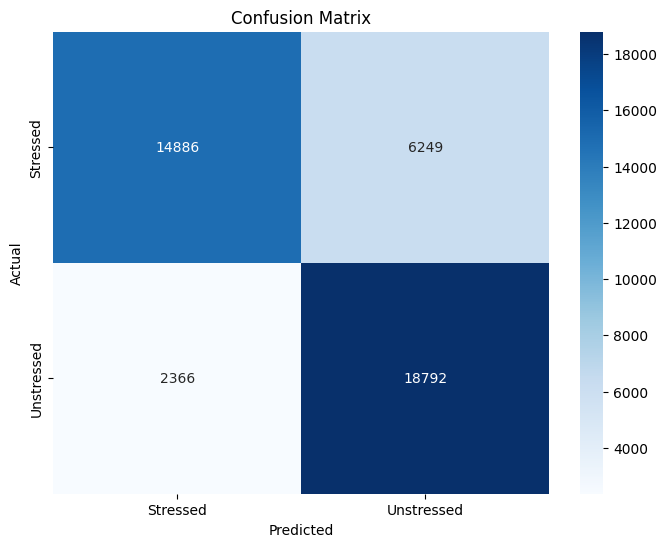

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(Y_test, y_test_pred)
print("\nClassification Report:")
print(classification_report(Y_test, y_test_pred, target_names=le.classes_))
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, log_loss

num_epochs = 10
batch_size = len(X_train) // num_epochs
batch = len(X_valid) // num_epochs
accuracy_per_epoch = []
validation_loss = []
training_loss = []
validation_accuracy = []

for epoch in range(num_epochs):
    start = epoch * batch_size
    end = start + batch_size
    X_batch, Y_batch = X_train[start:end], Y_train[start:end]

    rf.fit(X_batch, Y_batch)
    y_pred = rf.predict(X_batch)
    y_val_proba = rf.predict_proba(X_batch)
    accuracy = accuracy_score(Y_batch, y_pred)
    train_loss = log_loss(Y_batch, y_val_proba)
    training_loss.append(train_loss)

    accuracy_per_epoch.append(accuracy)
    print(f"Epoch {epoch + 1}/{num_epochs}: Accuracy = {accuracy:.4f}")

    start = epoch * batch
    end = start + batch
    X_batch, Y_batch = X_valid[start:end], Y_valid[start:end]

    y_pred = rf.predict(X_batch)
    y_val_proba = rf.predict_proba(X_batch)
    rf.fit(X_batch, Y_batch)
    valid_accuracy = accuracy_score(Y_batch, y_pred)
    val_loss = log_loss(Y_batch, y_val_proba)
    validation_loss.append(val_loss)

    validation_accuracy.append(valid_accuracy)
    print(f"Epoch {epoch + 1}/{num_epochs}: Validation_Accuracy = {valid_accuracy:.4f}")

Epoch 1/10: Accuracy = 0.9324
Epoch 1/10: Validation_Accuracy = 0.8829
Epoch 2/10: Accuracy = 0.9327
Epoch 2/10: Validation_Accuracy = 0.8545
Epoch 3/10: Accuracy = 0.9308
Epoch 3/10: Validation_Accuracy = 0.8730
Epoch 4/10: Accuracy = 0.9346
Epoch 4/10: Validation_Accuracy = 0.8737
Epoch 5/10: Accuracy = 0.9296
Epoch 5/10: Validation_Accuracy = 0.8772
Epoch 6/10: Accuracy = 0.9298
Epoch 6/10: Validation_Accuracy = 0.8609
Epoch 7/10: Accuracy = 0.9325
Epoch 7/10: Validation_Accuracy = 0.8722
Epoch 8/10: Accuracy = 0.9305
Epoch 8/10: Validation_Accuracy = 0.8751
Epoch 9/10: Accuracy = 0.9321
Epoch 9/10: Validation_Accuracy = 0.8602
Epoch 10/10: Accuracy = 0.9325
Epoch 10/10: Validation_Accuracy = 0.8694


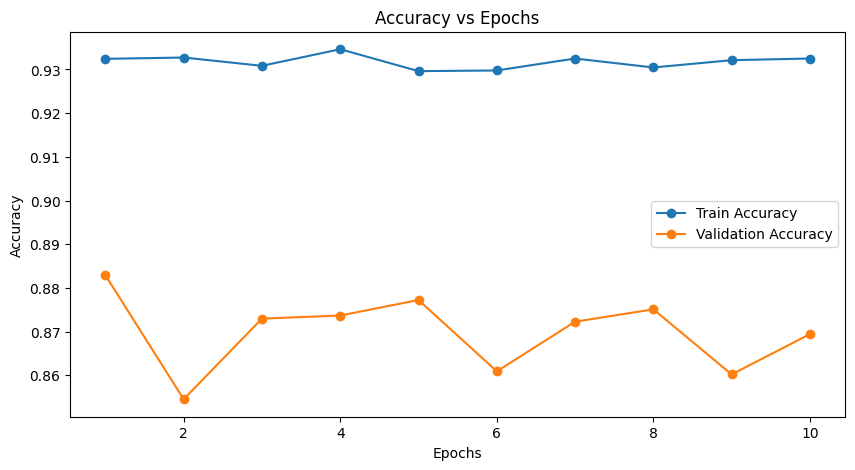

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), accuracy_per_epoch, label='Train Accuracy', marker='o')
plt.plot(range(1, 11), validation_accuracy, label='Validation Accuracy', marker='o')
plt.title('Accuracy vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

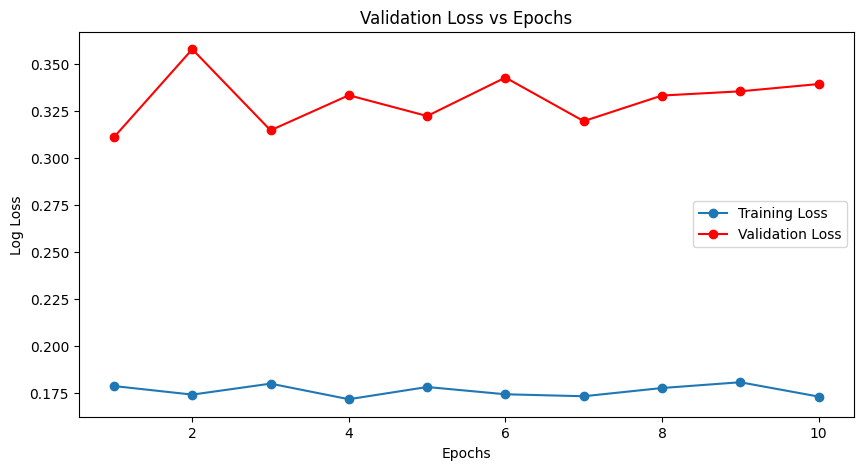

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), training_loss, label='Training Loss', marker='o')
plt.plot(range(1, 11), validation_loss, label='Validation Loss', marker='o', color='red')
plt.title('Validation Loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Log Loss')
plt.legend()
plt.show()

In [ ]:
y_test_pred = rf.predict(X_test)
test_accuracy = accuracy_score(Y_test, y_test_pred)
print(f"Final Test Accuracy: {test_accuracy * 100:.2f}%")

Final Test Accuracy: 85.88%



Classification Report:
              precision    recall  f1-score   support

    Stressed       0.89      0.82      0.85     21135
  Unstressed       0.83      0.90      0.86     21158

    accuracy                           0.86     42293
   macro avg       0.86      0.86      0.86     42293
weighted avg       0.86      0.86      0.86     42293



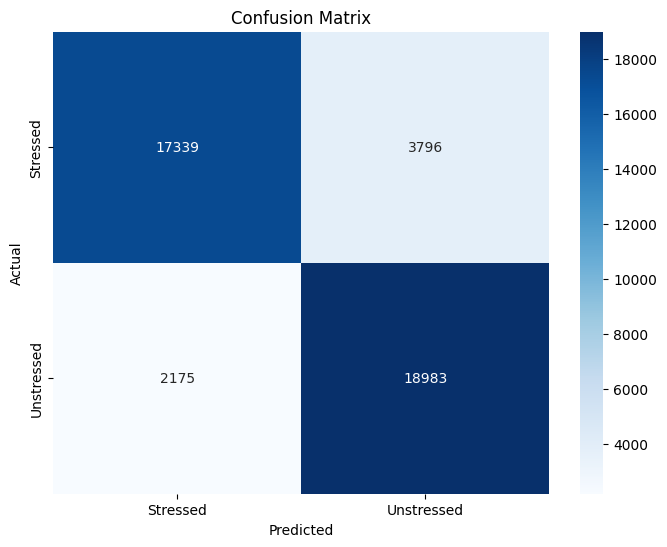

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(Y_test, y_test_pred)
print("\nClassification Report:")
print(classification_report(Y_test, y_test_pred, target_names=le.classes_))
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, log_loss

num_epochs = 10
batch_size = len(X_train) // num_epochs
batch = len(X_valid) // num_epochs
accuracy_per_epoch = []
validation_loss = []
training_loss = []
validation_accuracy = []

for epoch in range(num_epochs):
    start = epoch * batch_size
    end = start + batch_size
    X_batch, Y_batch = X_train[start:end], Y_train[start:end]

    dt.fit(X_batch, Y_batch)
    y_pred = dt.predict(X_batch)
    y_val_proba = dt.predict_proba(X_batch)
    accuracy = accuracy_score(Y_batch, y_pred)
    train_loss = log_loss(Y_batch, y_val_proba)
    training_loss.append(train_loss)

    accuracy_per_epoch.append(accuracy)
    print(f"Epoch {epoch + 1}/{num_epochs}: Accuracy = {accuracy:.4f}")

    start = epoch * batch
    end = start + batch
    X_batch, Y_batch = X_valid[start:end], Y_valid[start:end]

    y_pred = dt.predict(X_batch)
    y_val_proba = dt.predict_proba(X_batch)
    valid_accuracy = accuracy_score(Y_batch, y_pred)
    dt.fit(X_batch, Y_batch)
    val_loss = log_loss(Y_batch, y_val_proba)
    validation_loss.append(val_loss)

    validation_accuracy.append(valid_accuracy)
    print(f"Epoch {epoch + 1}/{num_epochs}: Validation_Accuracy = {valid_accuracy:.4f}")

Epoch 1/10: Accuracy = 1.0000
Epoch 1/10: Validation_Accuracy = 0.7970
Epoch 2/10: Accuracy = 1.0000
Epoch 2/10: Validation_Accuracy = 0.7757
Epoch 3/10: Accuracy = 1.0000
Epoch 3/10: Validation_Accuracy = 0.8141
Epoch 4/10: Accuracy = 1.0000
Epoch 4/10: Validation_Accuracy = 0.7949
Epoch 5/10: Accuracy = 1.0000
Epoch 5/10: Validation_Accuracy = 0.7991
Epoch 6/10: Accuracy = 1.0000
Epoch 6/10: Validation_Accuracy = 0.7977
Epoch 7/10: Accuracy = 1.0000
Epoch 7/10: Validation_Accuracy = 0.7970
Epoch 8/10: Accuracy = 1.0000
Epoch 8/10: Validation_Accuracy = 0.7970
Epoch 9/10: Accuracy = 1.0000
Epoch 9/10: Validation_Accuracy = 0.8062
Epoch 10/10: Accuracy = 1.0000
Epoch 10/10: Validation_Accuracy = 0.7999


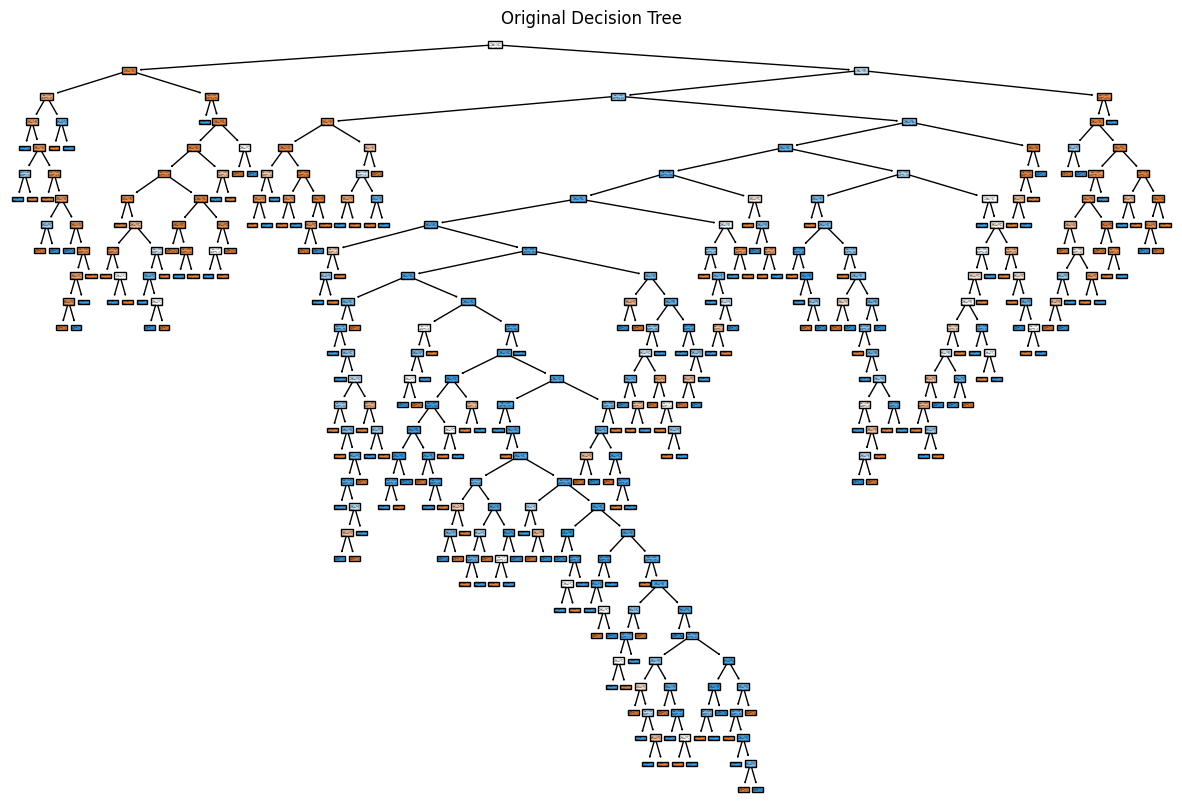

In [ ]:
from sklearn.tree import plot_tree
plt.figure(figsize=(15, 10))
plot_tree(dt, filled=True)
plt.title("Original Decision Tree")
plt.show()

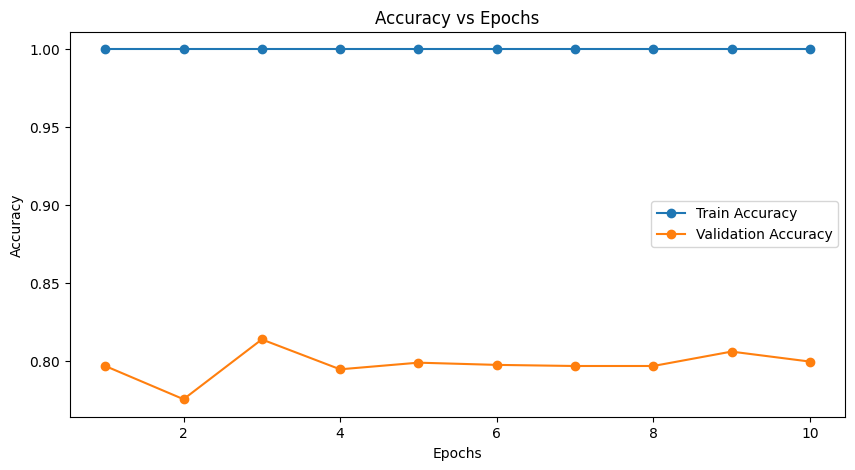

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), accuracy_per_epoch, label='Train Accuracy', marker='o')
plt.plot(range(1, 11), validation_accuracy, label='Validation Accuracy', marker='o')
plt.title('Accuracy vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

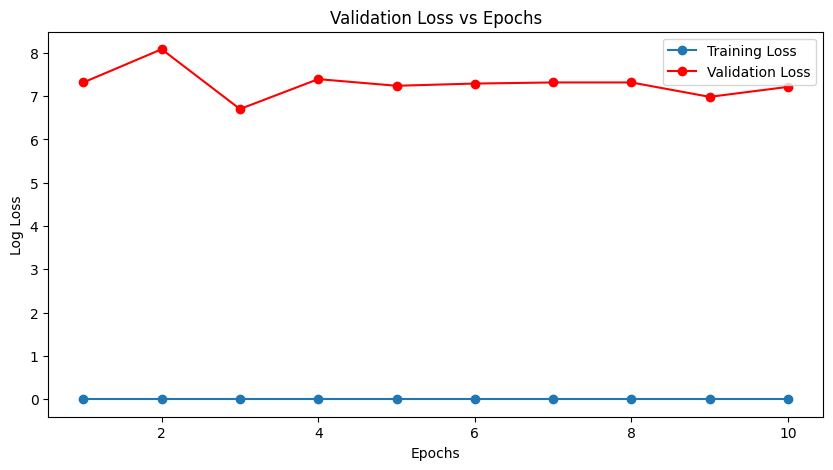

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), training_loss, label='Training Loss', marker='o')
plt.plot(range(1, 11), validation_loss, label='Validation Loss', marker='o', color='red')
plt.title('Validation Loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Log Loss')
plt.legend()
plt.show()

In [ ]:
y_test_pred = dt.predict(X_test)
test_accuracy = accuracy_score(Y_test, y_test_pred)
print(f"Final Test Accuracy: {test_accuracy * 100:.2f}%")

Final Test Accuracy: 78.12%



Classification Report:
              precision    recall  f1-score   support

    Stressed       0.78      0.78      0.78     21135
  Unstressed       0.78      0.78      0.78     21158

    accuracy                           0.78     42293
   macro avg       0.78      0.78      0.78     42293
weighted avg       0.78      0.78      0.78     42293



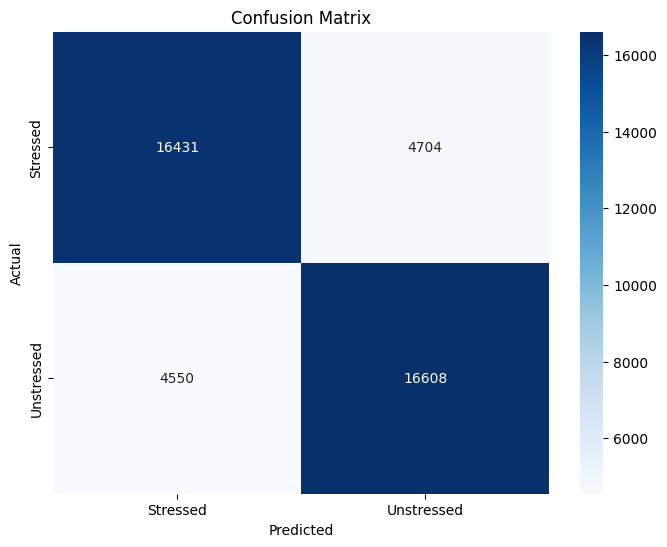

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(Y_test, y_test_pred)
print("\nClassification Report:")
print(classification_report(Y_test, y_test_pred, target_names=le.classes_))
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [ ]:
# Random search of parameters, using 3 fold cross validation,
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, Y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [ ]:
rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 10,
 'bootstrap': True}

In [ ]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))

    return accuracy
base_model = RandomForestClassifier(n_estimators = 10, random_state = 42)
base_model.fit(X_train, Y_train)
base_accuracy = evaluate(base_model, X_test, Y_test)

Model Performance
Average Error: 0.1560 degrees.
Accuracy = -inf%.


In [ ]:
rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 10,
 'bootstrap': True}

In [ ]:
best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, X_test, Y_test)

Model Performance
Average Error: 0.1407 degrees.
Accuracy = -inf%.


In [ ]:
print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))

Improvement of nan%.


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
param_dist = {
    'C': uniform(0.1, 10),  # Uniform distribution between 0.1 and 10
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'gamma': ['scale', 'auto'] + list(np.logspace(-3, 3, 50))
}

randomized_search = RandomizedSearchCV(estimator=svm_model, param_distributions=param_dist, n_iter=20, cv=5)

randomized_search.fit(X_train, Y_train)

In [ ]:
best_params_rand = randomized_search.best_params_
best_model_rand = randomized_search.best_estimator_

# Evaluate the best model
y_pred_best_rand = best_model_rand.predict(X_test)
accuracy_best_rand = accuracy_score(Y_test, y_pred_best_rand)
print(f"Best SVM Accuracy: {accuracy_best_rand:.2f}")
print(f"Best Hyperparameters: {best_params_rand}")

Best SVM Accuracy: 0.84
Best Hyperparameters: {'C': 5.069797523758469, 'gamma': 0.21209508879201905, 'kernel': 'rbf'}
